# TP2 Álgebra Lineal Computacional

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

1

In [ ]:
def jacobiMat(A, b, x0, s):
    n = np.shape(A)[0]

    x = x0
    M = np.diag(np.diag(A))
    N = A - M

    error = np.linalg.norm(A@x-b)/np.linalg.norm(b)
    k = 0

    while (k in range(s)) and (error > 10**(-8)):
        x = -(np.linalg.inv(M) @ N) @ x + np.linalg.inv(M) @ b
        error = np.linalg.norm(A@x-b)/np.linalg.norm(b)
        k += 1
    return(x, k) #solución, iteraciones

2

In [ ]:
A = np.array([[4,2,1],[1,4,1],[2,1,5]])
b = np.array([9,5,0])
x0 = np.array([1,1,1])

In [ ]:
jacobiMat(A, b, x0, 50)

(array([ 2.00000001,  1.        , -0.99999999]), 36)

Se alcanza la convergencia en 36 pasos

3)

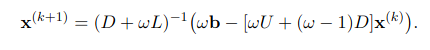

In [ ]:
def SOR(A, b, x0, s, w):
    n = np.shape(A)[0]

    x = x0
    D = np.diag(np.diag(A))
    L = np.tril(A, -1)
    U = np.triu(A, 1)
    M_inv = np.linalg.inv(D + w*L)

    error = np.linalg.norm(A@x-b)/np.linalg.norm(b)
    k = 0

    while (k in range(s)) and (error > 10**(-8)):
        x = M_inv @ (w*b - (w*U + (w-1)*D)@ x)
        error = np.linalg.norm(A@x-b)/np.linalg.norm(b)
        k += 1
    return(x, k)

Es condición necesaria que w pertenezca a (0, 2) para que converja.

4)

In [ ]:
SOR(A,b, x0, 50, 1)

(array([ 1.99999998,  1.        , -0.99999999]), 13)

In [ ]:
SOR(A,b, x0, 50, 1.5)

(array([ 1.99999998,  0.99999999, -1.        ]), 43)

In [ ]:
SOR(A,b, x0, 50, 2.5)

(array([-2.01349162e+11,  1.21088400e+11,  2.93734627e+11]), 50)

Se alcanza convergencia en los primeros 2.
Para w = 1 en 13 pasos.
Para w = 1.5 en 43 pasos.

5)

A es de [0,1), pero (casi) nunca va a ser 1 exactamente

In [ ]:
A5 = np.random.rand(5,5)

for i in range(len(A5)):
  A5[i,i] = 4

print(A5)

[[4.         0.04252291 0.61921236 0.38611035 0.7876244 ]
 [0.25629542 4.         0.51653389 0.76496384 0.18885591]
 [0.31817898 0.12826569 4.         0.53291869 0.04086384]
 [0.14702069 0.17909472 0.90382529 4.         0.87850048]
 [0.81360794 0.29407066 0.45885669 0.60750311 4.        ]]


In [ ]:
x0 = np.random.rand(5)
b = np.random.rand(5)

In [ ]:
jacobiMat(A5, b, x0, 100)

(array([ 0.20956502,  0.09263934, -0.03350853,  0.14749758,  0.03879054]), 24)

El método converge.

6)

In [ ]:
ws = np.linspace(0, 2, 1001)
pasos = []
for w in ws:
  pasos.append(SOR(A5, b, x0, 100, w)[1])
pasos = np.array(pasos)

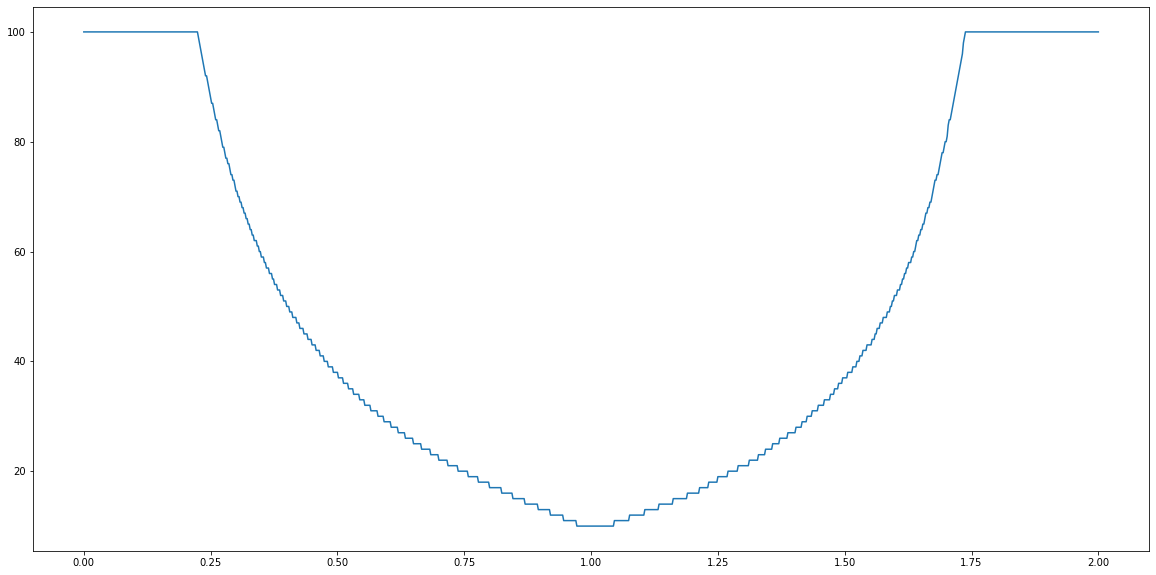

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(ws, pasos)
plt.show()

In [ ]:
inicio = np.where(pasos < 100)[0][0]
w_inicial = ws[inicio]

In [ ]:
fin = np.where(pasos < 100)[0][-1]
w_final = ws[fin]

In [ ]:
print("El intervalo en el que se obtuvo convergencia sin superar la cantidad máxima de iteraciones es: ")
[w_inicial, w_final]

El intervalo en el que se obtuvo convergencia sin superar la cantidad máxima de iteraciones es: 


[0.226, 1.736]

In [ ]:
min_pasos = pasos[np.argmin(pasos)]

In [ ]:
mejor_w = ws[np.where(pasos == min_pasos)]

Mejores w: Valores cercanos a 1

In [ ]:
mejor_w

array([0.972, 0.974, 0.976, 0.978, 0.98 , 0.982, 0.984, 0.986, 0.988,
       0.99 , 0.992, 0.994, 0.996, 0.998, 1.   , 1.002, 1.004, 1.006,
       1.008, 1.01 , 1.012, 1.014, 1.016, 1.018, 1.02 , 1.022, 1.024,
       1.026, 1.028, 1.03 , 1.032, 1.034, 1.036, 1.038, 1.04 , 1.042,
       1.044])

7)

In [ ]:
def spectralSOR(A, w):
  D = np.diag(np.diag(A))
  L = np.tril(A, -1)
  U = np.triu(A, 1)

  T = np.linalg.inv(D + w * L) @ (-w * U + (1 - w)* D)


  return max(np.abs(np.linalg.eigvals(T)))

8)

In [ ]:
specWs = [] #radios espectrales para cada w
for w in ws:
  specWs.append(spectralSOR(A5, w))

print(specWs)

[1.0, 0.9985040781816045, 0.9970073715224288, 0.9955098790149908, 0.994011599649693, 0.9925125324147833, 0.9910126762963821, 0.9895120302784416, 0.9880105933427497, 0.9865083644689284, 0.9850053426343979, 0.983501526814396, 0.9819969159819519, 0.9804915091078719, 0.9789853051607393, 0.9774783031068957, 0.9759705019104374, 0.9744619005332023, 0.9729524979347453, 0.9714422930723511, 0.9699312849010031, 0.9684194723733769, 0.9669068544398325, 0.9653934300483981, 0.9638791981447548, 0.9623641576722403, 0.9608483075718082, 0.9593316467820413, 0.9578141742391252, 0.9562958888768396, 0.9547767896265433, 0.9532568754171529, 0.951736145175148, 0.9502145978245455, 0.9486922322868709, 0.9471690474811783, 0.9456450423240028, 0.944120215729363, 0.9425945666087416, 0.9410680938710717, 0.9395407964227174, 0.9380126731674592, 0.9364837230064836, 0.9349539448383618, 0.9334233375590265, 0.9318919000617717, 0.9303596312372187, 0.9288265299733113, 0.9272925951552902, 0.9257578256656832, 0.9242222203842706

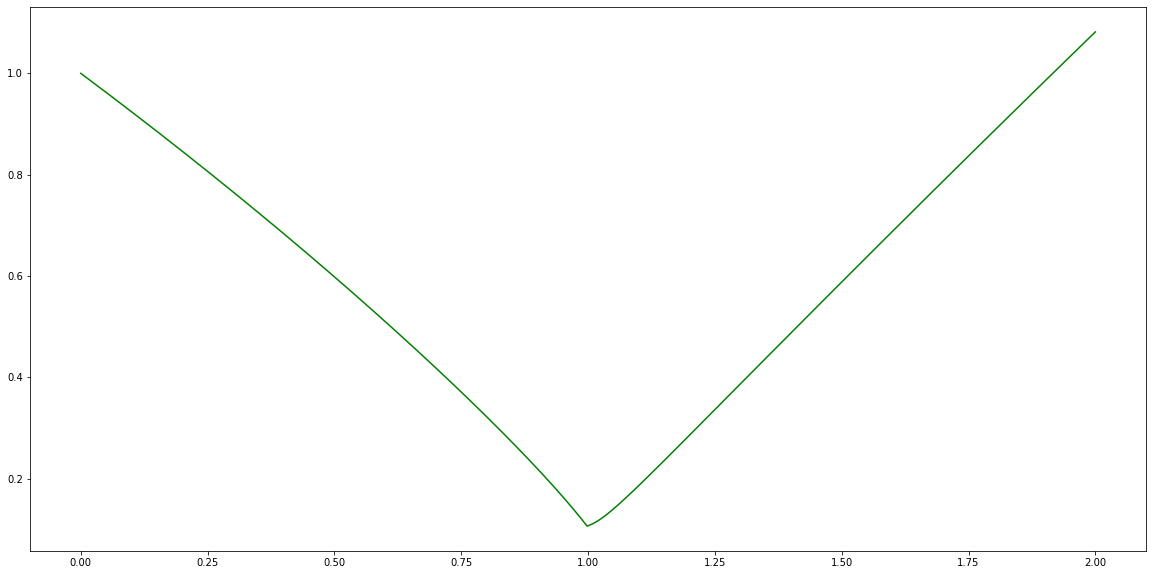

In [ ]:
plt.rcParams['figure.figsize'] = [20,10]
plt.plot(ws, specWs, 'g')
plt.show()

In [ ]:
specWs = np.array(specWs)
specWs

array([1.        , 0.99850408, 0.99700737, ..., 1.07786059, 1.07980312,
       1.08174539])

In [ ]:
ab = np.where(specWs > 1)

#más fácil ver para qué valor es más grande
print(f"Para los valores menores a {ws[np.min(ab)]} que le corresponde radio espectral {specWs[np.min(ab)]}")

Para los valores menores a 1.9180000000000001 que le corresponde radio espectral 1.001898898088191


In [ ]:
print(np.argmin(specWs))

print(np.where(specWs == np.min(specWs))) #un único mínimo

print('Valor de omega: ' + str(ws[np.argmin(specWs)]))

499
(array([499]),)
Valor de omega: 0.998


Los resultados coinciden con lo esperado, vemos una correlación no lineal.

9)

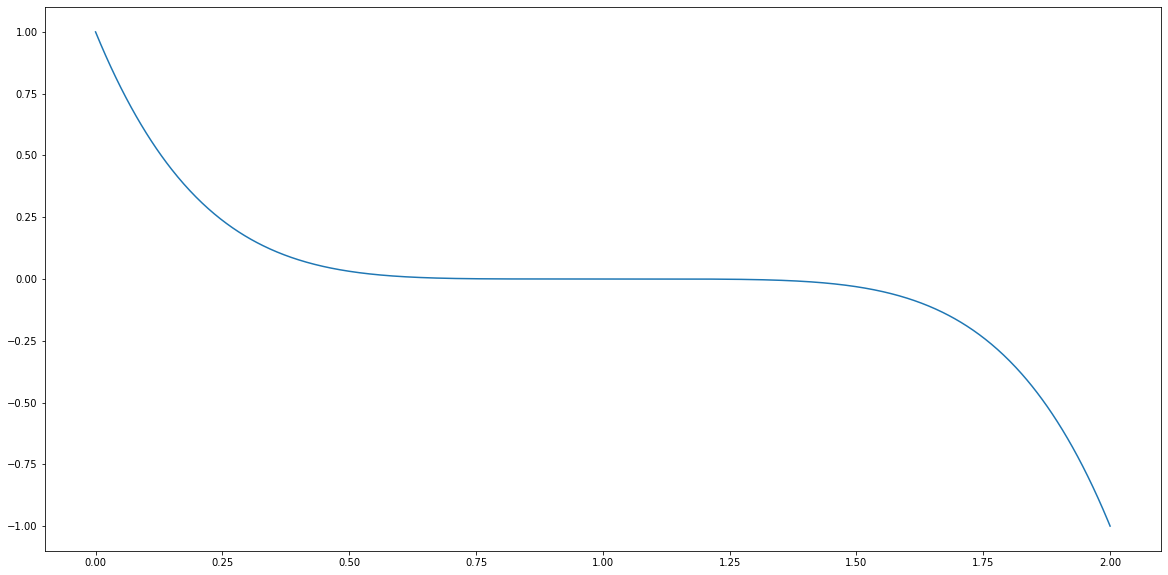

In [ ]:
dets = []
for w in ws:
  dets.append((1-w)**5)

dets = np.array(dets)
plt.plot(ws, dets)
plt.show()

El determinante es menor para todos los valores > 0

El valor más chico se obtuvo para w = 2

10)

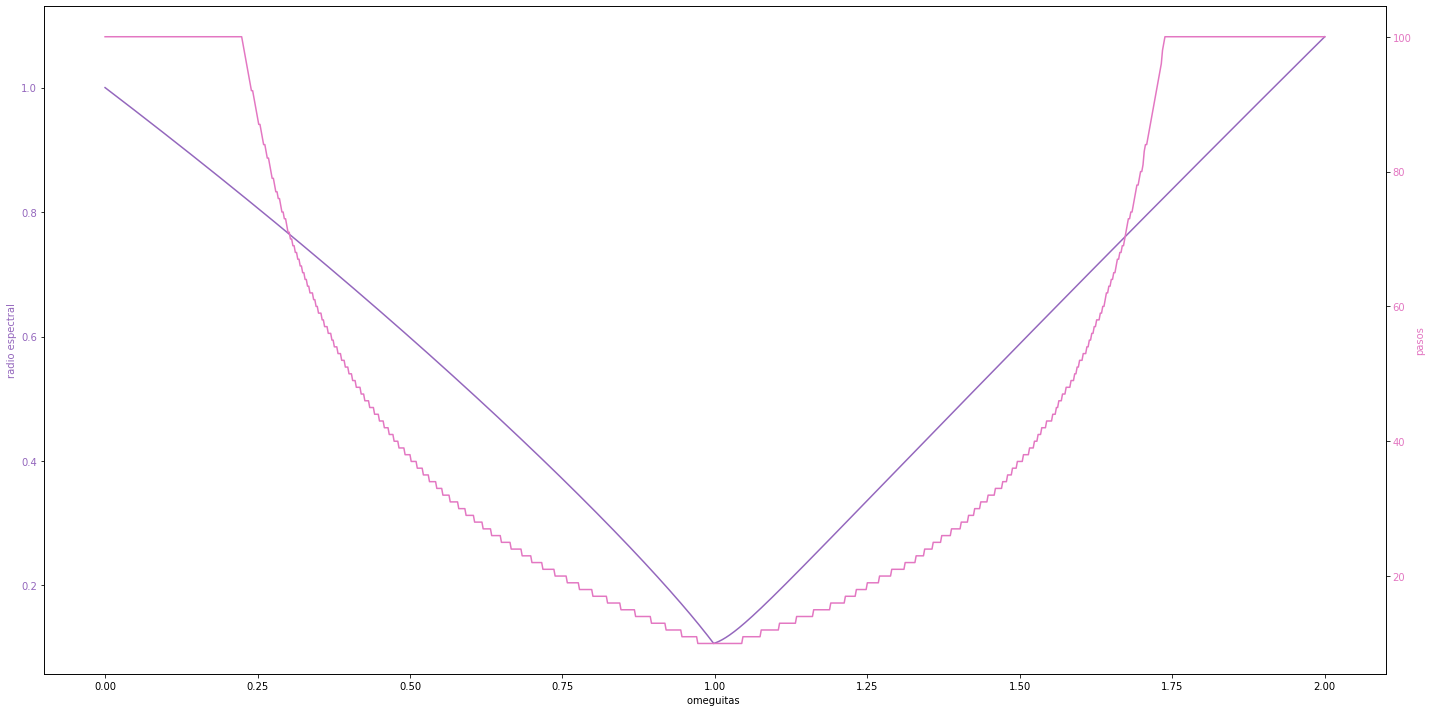

In [ ]:
data1 = specWs
data2 = pasos

fig , ax1 = plt.subplots( )
color = "tab:purple"
ax1.set_xlabel("omeguitas ")
ax1.set_ylabel("radio espectral", color = color)
ax1.plot(ws, data1, color=color)
ax1.tick_params(axis="y",labelcolor=color)

ax2 = ax1.twinx()

color = "tab:pink"
ax2.set_ylabel("pasos", color=color)
ax2.plot(ws, data2, color=color)
ax2.tick_params(axis="y",labelcolor=color)

fig.tight_layout()
plt.show()